In [1]:
x = [-3,31,-11,4,0,22,-2,-5,-25,-14]
y = [-2,32,-10,5,1,23,-1,-4,-24,-13]
print(x)
print(y)
# x값에 1을 더한 값이 y로 출력됨을 알 수 있다.

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


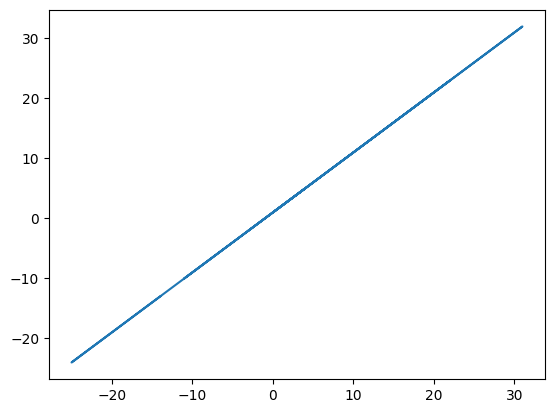

In [2]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()
# 데이터의 형태를 살펴보면서 데이터의 특성을 파악하는 과정(탐색적 데이터 분석)

In [3]:
# 머신러닝 모델에 입력할 데이터를 정리하기 위해 판다스를 이용
# 판다스 dataFrame 함수에 딕셔너리 형태로 입력하면 데이터 프레임이 만들어진다.
# 이떄 x리스트는 'X'열의 데이터가 되고, y리스트는 'Y'열의 데이터로 변환된다.
import pandas as pd
df = pd.DataFrame({'X':x, 'Y':y})
df.shape
#10행 2열 구조

(10, 2)

In [4]:
# head 메소드는 데이터프레임의 첫 5개 행(인덱스0~4)을 추출해서 표시한다. 
# 추출된 부분도 데이터프레임의 자료구조를 갖는다.
df.head()

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [5]:
# tail 메소드는 데이터프레임의 뒤에서부터 5개 행을 보여준다.
df.tail()

,X,Y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [6]:
# 모델 학습에 사용할 설명변수(X)에 해당하는 입력 데이터를 만든다. 
# X열의 데이터를 선택하여 X_train에 저장한다.
# 목표변수(Y)에 해당하는 레이블은 Y열을 선택하여 y-train에 저장한다.

In [10]:
train_features =['X']
target_cols = ['Y']
X_train = df.loc[:, train_features]
Y_train = df.loc[:, target_cols]
print(X_train.shape, Y_train.shape)

(10, 1) (10, 1)


In [8]:
# 머신러닝 알고리즘을 적용하여 선형회귀 관계식을 찾아본다. 
# 사이킷런(sklearn) 패키지의 linear_model 모듈에서 LinearRegression 클래스 함수를 불러 온다.
# LinearRegression 클래스 함수는 선형회귀 모델을 구현해 놓은 코드다.
# 모델 인스턴스 객체를 생성하고 lr 변수에 저장한다. 
# fit메소드는 입력 데이터를 모델에 전달하여 학습시키는 함수명령이다.
# 입력데이터(X_train)와 목료 레이블(y_train)을 전달하면 선형관계식을 찾는다.

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
# 학습을 끝낸 lr 모델 인스턴스 객체의 coef_속성으로 부터 X변수의 회귀계수(기울기)를 얻을 수 있다.
# Intercept_속성은 상수항(y절편)을 나타낸다.
lr.coef_, lr.intercept_

(array([[1.]]), array([1.]))

In [13]:
# X변수 회귀계수가 1이고 상수항이 1이므로, lr 모델은 Y = X +1의 관계식을 갖는다.
print("기울기:", lr.coef_[0][0]) # 입력데이터가 2차원구조 이므로 회귀계수도 2차원 구조로 반환
print("y절편:", lr.intercept_[0])

기울기: 0.9999999999999999
y절편: 0.9999999999999999


In [14]:
# 학습을 마친 모델에 predict 메소드를 적용하면 
# 새로운 입력 데이터 X에 대한 Y레이블을 예측 할 수 있다.
# X값으로 숫자 11을 입력하여 Y값을 예측해보자
# 학습에 사용한 X_train이 2차원 구조이므로, predict 메소드 입력값은 2차원 구조를 가져야 한다.
# 넘파이 라이브러리의 array 함수로 숫자 11을 배열로 변환하고, reshape 매소드를 적용하여
# (1행,1열) 형태의 2차원 구조로 변형한다. 예측값 12가 출력된다.  

In [15]:
import numpy as np
x_new = np.array(11).reshape(1,1)
lr.predict(x_new)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.]])

In [16]:
# 이번에는 predict 메소드의 입력 데이터로 여러 개의 숫자를 사용한다.
# 넘파이 모듈의 arange함수를 사용한다
# np.arange(11.16.1)은 11부터 15까지 정수를 1의 간격을 두고 1차원 배열을 만든다.
# 여기에 reshape(-1,1) 매소드를 적용하면(n행,1열)의 형태의 2차원 구조로 변환된다.
# 여기서 -1은 전체의 수를 의미하기에 n으로 볼수 있다.
# 모두 5개의 원소가 있으므로 열을 1개로 고정한 상태에서 5개의 행이 필요하다.
# 따라서 (5행, 1열) 형태의 2차원 배열로 결정된다. 즉 -1위치에 5가들어가게 된다.

In [17]:
x_test = np.arange(11,16,1).reshape(-1,1)
x_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [18]:
# predict 메소드 함수에 x_test배열을 입력해서 y_pred 값을 예측한다. 
# Y = X + 1의 관계식을 갖는 모델이므로 11~15까지의 값에 1을 더한 
# 결과인 12~16까지의 숫자 배열이 반환된다. 
y_pred = lr.predict(x_test)
y_pred

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])